In [201]:
import pandas as pd
import numpy as np
import seaborn as sns

In [202]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


C:\Users\rushc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

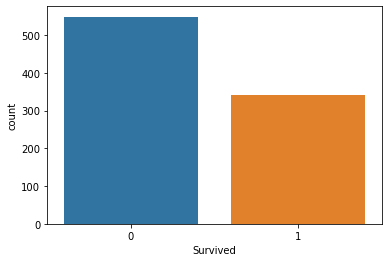

In [203]:
sns.countplot(train_df['Survived'],label="Count")

In [204]:
train_df.drop(['Ticket', 'Cabin', 'PassengerId', 'Embarked', 'Name'], axis=1, inplace=True)
test_df.drop(['Ticket', 'Cabin', 'Embarked', 'Name'], axis=1, inplace=True)

<AxesSubplot:>

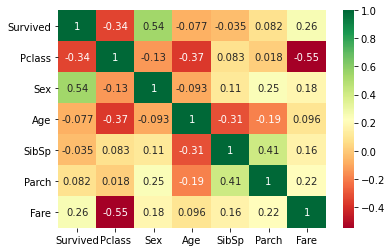

In [205]:
train_df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
test_df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
sns.heatmap(train_df.corr(), annot=True, cbar=True, cmap="RdYlGn")

In [206]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)

In [207]:
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22,1,0,7.2500
1,1,1,1,38,1,0,71.2833
2,1,3,1,26,0,0,7.9250
3,1,1,1,35,1,0,53.1000
4,0,3,0,35,0,0,8.0500
5,0,3,0,29,0,0,8.4583
6,0,1,0,54,0,0,51.8625
7,0,3,0,2,3,1,21.0750
8,1,3,1,27,0,2,11.1333
9,1,2,1,14,1,0,30.0708


In [208]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()
passenger = X_test['PassengerId']
X_test.drop(['PassengerId'], axis=1, inplace=True)

In [209]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34,0,0,7.8292
1,3,1,47,1,0,7.0000
2,2,0,62,0,0,9.6875
3,3,0,27,0,0,8.6625
4,3,1,22,1,1,12.2875
...,...,...,...,...,...,...
413,3,0,29,0,0,8.0500
414,1,1,39,0,0,108.9000
415,3,0,38,0,0,7.2500
416,3,0,29,0,0,8.0500


In [210]:
cross_valid_scores = {}

In [211]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [212]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 75, 80, 95, 100, 110], 
    "max_depth": [3, 5, 7, 9, 11, 13, None],
}

model_random_forest = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(X_train, Y_train)

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
print('-----')

-----
Best parameters {'max_depth': 9, 'n_estimators': 10}
Mean cross-validated accuracy score of the best_estimator: 0.836
-----
Wall time: 58.4 s


In [214]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 75, 80, 95, 100, 110], 
    "learning_rate": [0.1, 0.3, 0.5, 0.7, 0.9, 1],
}

model_adaboost = AdaBoostClassifier(
    random_state=42,
)

model_adaboost = GridSearchCV(
    model_adaboost, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_adaboost.fit(X_train, Y_train)

print('-----')
print(f'Best parameters {model_adaboost.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_adaboost.best_score_:.3f}'
)
cross_valid_scores['adaboost'] = model_adaboost.best_score_
print('-----')

-----
Best parameters {'learning_rate': 1, 'n_estimators': 95}
Mean cross-validated accuracy score of the best_estimator: 0.812
-----
Wall time: 52.5 s


In [216]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 75, 80, 95, 100, 110], 
    "learning_rate": [0.1, 0.3, 0.5, 0.7, 0.9, 1],
}

model_gradientboost = GradientBoostingClassifier(
    random_state=42,
)

model_gradientboost = GridSearchCV(
    model_gradientboost, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_gradientboost.fit(X_train, Y_train)

print('-----')
print(f'Best parameters {model_gradientboost.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_gradientboost.best_score_:.3f}'
)
cross_valid_scores['gradientboost'] = model_gradientboost.best_score_
print('-----')

-----
Best parameters {'learning_rate': 0.3, 'n_estimators': 55}
Mean cross-validated accuracy score of the best_estimator: 0.843
-----
Wall time: 28.9 s


In [217]:
X_train.shape

(891, 6)

In [218]:
X_test.shape

(418, 6)

In [219]:
def make_submitions(model, X_test, name):
    value = model.predict(X_test)
    value.shape
    pd.DataFrame({
        "PassengerId": passenger,
        "Survived": value
    }).to_csv(name + '.csv', index=False) # Index must be False for Kaggle to make correct csv submitions
    
make_submitions(model_gradientboost, X_test, "submissions_gradientboost")